<h1>Coronary Heart Disease Prediction using Logistics Regression🫀</h1>

## Importing Modules

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

## Importing the dataset

In [144]:
dataset = pd.read_csv('framingham.csv')

## EDA

In [145]:
dataset.shape

(4238, 16)

In [146]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [147]:
dataset.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [148]:
dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [149]:
dataset.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


## Finding the total 'nan' values in each column

In [150]:
dataset.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

## Correlation Analysis

In [151]:
dataset.corrwith(dataset['TenYearCHD']) * 100

male                 8.842757
age                 22.525610
education           -5.405896
currentSmoker        1.945627
cigsPerDay           5.788426
BPMeds               8.748858
prevalentStroke      6.180995
prevalentHyp        17.760273
diabetes             9.731651
totChol              8.218428
sysBP               21.642904
diaBP               14.529910
BMI                  7.519193
heartRate            2.291261
glucose             12.554400
TenYearCHD         100.000000
dtype: float64

### Correlation Plot

<Axes: >

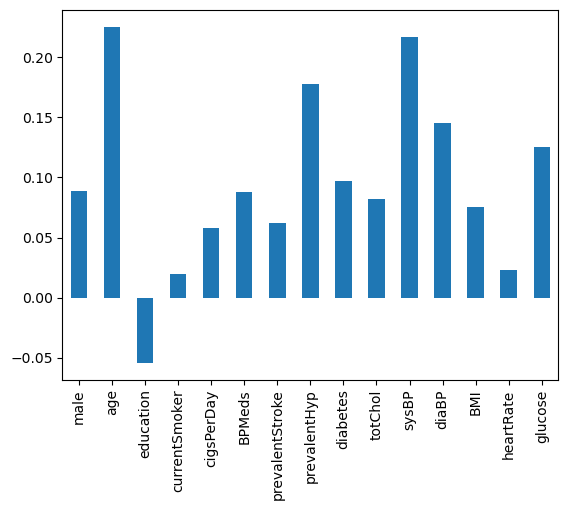

In [152]:
dataset.corr()['TenYearCHD'][:-1].plot(kind = 'bar')

### Correlation Heap Map

<Axes: >

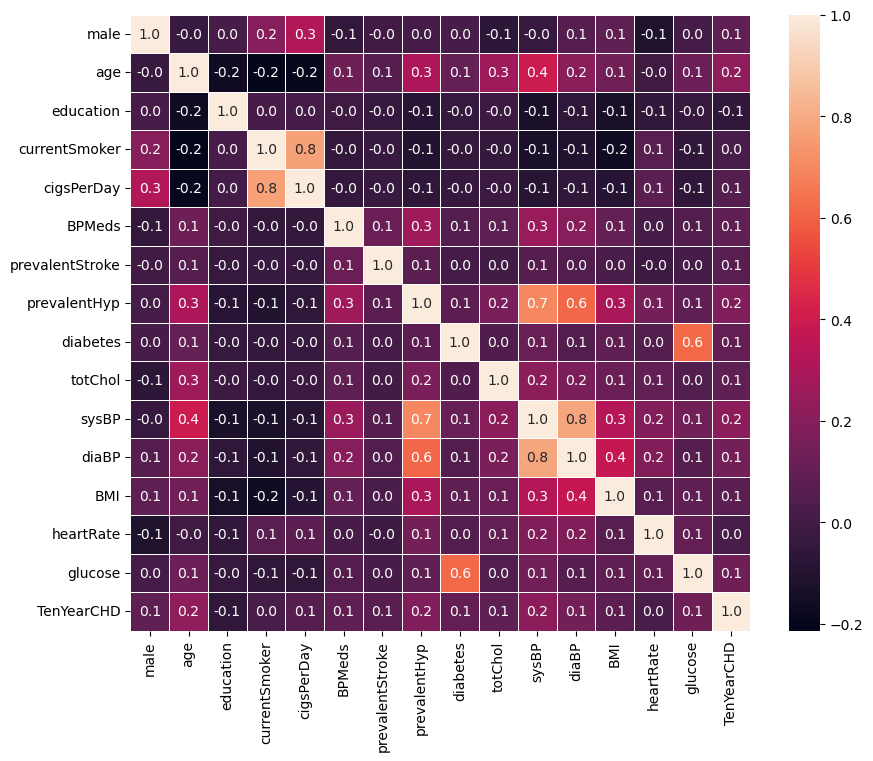

In [153]:
f,ax = plt.subplots(figsize = (10, 8))
sns.heatmap(dataset.corr(), annot = True, linewidths = 0.5, fmt = '0.1f', ax = ax)

#### Inference: As 'education' feature shows negative correlation with all the other predictor varibles and the target variable, we delete the feature.

In [154]:
del dataset['education']

In [155]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


### Dropping all the rows with values 'nan' in them

In [156]:
dataset.dropna(axis = 0, inplace = True) 

In [157]:
dataset.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [158]:
dataset.TenYearCHD.value_counts()

TenYearCHD
0    3177
1     572
Name: count, dtype: int64

<Axes: xlabel='TenYearCHD', ylabel='count'>

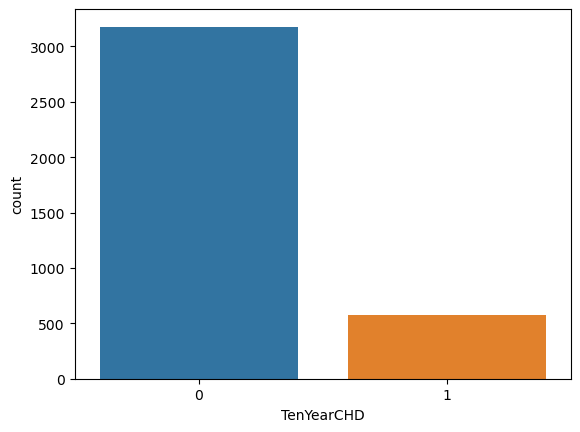

In [159]:
sns.countplot(x = "TenYearCHD", data = dataset)

<h3>According to the graph ⬆️, there are about 3177 patients with no heart disease
and 572 patients with the risk of heart disease</h3>

## Feature Selection

In [160]:
X = dataset.drop('TenYearCHD', axis = 1)
y = dataset['TenYearCHD']

In [161]:
print(X.shape, y.shape)

(3749, 14) (3749,)


In [162]:
# !pip install statsmodels

In [163]:
import statsmodels.api as sm

In [164]:
X['intercept'] = 1

In [165]:
X.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,intercept
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,1
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,1
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,1
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,1


In [166]:
logit_model = sm.Logit(y, X)
logit_result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.377199
         Iterations 7


In [167]:
print(logit_result.summary())

                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3749
Model:                          Logit   Df Residuals:                     3734
Method:                           MLE   Df Model:                           14
Date:                Tue, 13 Jun 2023   Pseudo R-squ.:                  0.1169
Time:                        22:34:48   Log-Likelihood:                -1414.1
converged:                       True   LL-Null:                       -1601.4
Covariance Type:            nonrobust   LLR p-value:                 2.922e-71
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
male                0.5740      0.107      5.343      0.000       0.363       0.785
age                 0.0640      0.007      9.787      0.000       0.051       0.077
currentSmoker       0.0732      

In [168]:
X = dataset[['male', 'age','cigsPerDay', 'totChol', 'sysBP', 'glucose']]
y = dataset['TenYearCHD']

In [169]:
# X

In [170]:
X['iteration'] = 1

/var/folders/gd/kcf7yq1s0tj51bt7fy6p0v780000gn/T/ipykernel_1846/517150867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['iteration'] = 1


In [171]:
X

,male,age,cigsPerDay,totChol,sysBP,glucose,iteration
0,1,39,0.0,195.0,106.0,77.0,1
1,0,46,0.0,250.0,121.0,76.0,1
2,1,48,20.0,245.0,127.5,70.0,1
3,0,61,30.0,225.0,150.0,103.0,1
4,0,46,23.0,285.0,130.0,85.0,1
...,...,...,...,...,...,...,...
4231,1,58,0.0,187.0,141.0,81.0,1
4232,1,68,0.0,176.0,168.0,79.0,1
4233,1,50,1.0,313.0,179.0,86.0,1
4234,1,51,43.0,207.0,126.5,68.0,1


In [172]:
logit_model = sm.Logit(y, X)
logit_result = logit_model.fit()
print(logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.378120
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3749
Model:                          Logit   Df Residuals:                     3742
Method:                           MLE   Df Model:                            6
Date:                Tue, 13 Jun 2023   Pseudo R-squ.:                  0.1148
Time:                        22:34:48   Log-Likelihood:                -1417.6
converged:                       True   LL-Null:                       -1601.4
Covariance Type:            nonrobust   LLR p-value:                 2.548e-76
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
male           0.5813      0.105      5.521      0.000       0.375       0.788
age            0.0654      0.

## Splitting the data into Train and Test sets

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Logistic Regression Model

In [174]:
from sklearn.linear_model import LogisticRegression

In [175]:
model = LogisticRegression(max_iter = 100000000)

In [176]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=100000000)

In [177]:
prediction = model.predict(X_test)

In [178]:
from sklearn.metrics import accuracy_score

In [179]:
score = accuracy_score(y_test, prediction)

In [180]:
print("Accuracy of the model: ", score * 100, "%")

Accuracy of the model:  84.62222222222222 %


# Neural Network Model

In [181]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [182]:
X = dataset[['male', 'age','cigsPerDay', 'totChol', 'sysBP', 'glucose']]
y = dataset['TenYearCHD']

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [184]:
NN_model = Sequential([
    Dense(units = 100, activation = 'relu'),
    Dense(units = 50, activation = 'relu'),
    Dense(units = 1, activation = 'sigmoid')
    
])

In [185]:
NN_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [186]:
NN_model.fit(X_train, y_train, epochs = 25, batch_size = 20, validation_split = 0.2)

Epoch 1/25


105/105 [==============================] - 2s 11ms/step - loss: 1.4884 - accuracy: 0.7970 - val_loss: 0.4435 - val_accuracy: 0.8495
Epoch 2/25
105/105 [==============================] - 1s 7ms/step - loss: 0.5245 - accuracy: 0.8252 - val_loss: 0.4842 - val_accuracy: 0.8476
Epoch 3/25
105/105 [==============================] - 1s 8ms/step - loss: 0.5082 - accuracy: 0.8256 - val_loss: 0.4435 - val_accuracy: 0.8533
Epoch 4/25
105/105 [==============================] - 1s 8ms/step - loss: 0.6799 - accuracy: 0.7847 - val_loss: 0.6032 - val_accuracy: 0.6819
Epoch 5/25
105/105 [==============================] - 1s 8ms/step - loss: 0.5522 - accuracy: 0.8094 - val_loss: 0.4455 - val_accuracy: 0.8514
Epoch 6/25
105/105 [==============================] - 1s 8ms/step - loss: 0.4546 - accuracy: 0.8437 - val_loss: 0.4721 - val_accuracy: 0.8362
Epoch 7/25
105/105 [==============================] - 1s 8ms/step - loss: 0.4970 - accuracy: 0.8337 - val_loss: 0.6875 - val_accuracy: 0.8514
Epoch 8/25
105/1

In [187]:
loss, accuracy = NN_model.evaluate(X_test, y_test)

36/36 [==============================] - 0s 5ms/step - loss: 0.4446 - accuracy: 0.8356


In [188]:
print("Test loss: ", loss)
print("Test Accuracy: ", accuracy)

Test loss:  0.4445731043815613
Test Accuracy:  0.8355555534362793
